<b>JUDUL PROJECT : KLASIFIKASI DAN PREDIKSI KULATIAS AIR MENGGUNAKAN METODE RANDOM FOREST</b>

<p><b>NAMA : DAFFA KUMARA KHIAR FAISA</b></p>

<p><b>NIM : A11.2022.14767</b></p>

<h4><b>PENDAHULUAN</b></h4>

<h5><b>RINGKASAN</b></h5>
<p style = 'text-align: justify;'>Kualitas air sangat penting untuk keberlanjutan lingkungan dan kesehatan manusia, terutama untuk konsumsi, pertanian, dan industri. Namun, menilai kualitas air dengan akurat dan efisien seringkali menantang karena banyaknya variabel yang kompleks. Penggunaan teknologi machine learning untuk memprediksi kualitas air menjadi semakin penting. Dengan data historis dan teknik seperti random forest, kita dapat mengembangkan model prediktif yang membantu mengidentifikasi pola, tren, dan faktor yang mempengaruhi kualitas air.</p>

<h5><b>MASALAH</b></h5>
<p style = 'text-align: justify;'>Bagaimana kita dapat mengembangkan odel klasifikasi yang cepat dan akurat untuk menilai kualitas air menggunakan metode linear agara dapat memastikan keamanan air yang digunakan oleh masyarakat dan segera mengambil tindakan pencegahan jika ditemukan air yang tidak memenuhi standar?</p>


<h5><b>TUJUAN</b></h5>
<P style = 'text-align: justify;'>Tujuan utama yang akan di capai melalui project ini yaitu, diharapkan akan membantu memantau dan menilai kualitas air secara berkala guna memastikan bahwa air yang tersedia memenuhi standar keamanan dan kesehatan bagi konsomsi manusia dan lingkungan.</P>

<h5><b>ALUR PENYELESAIAN </b></h5>

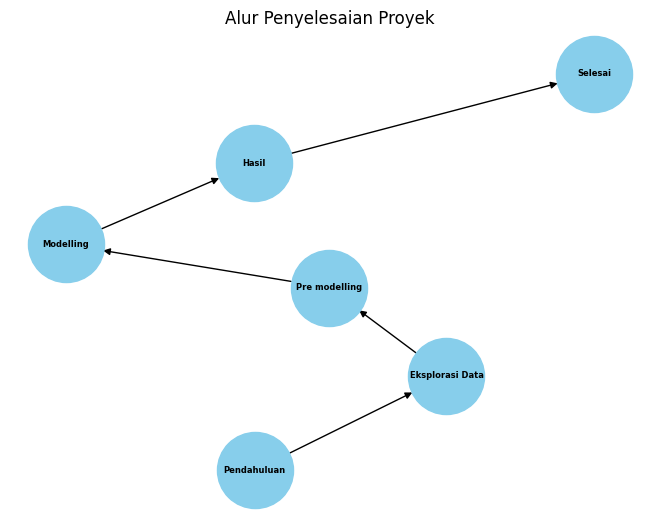

In [51]:
# Mengimpor library
import matplotlib.pyplot as plt
import networkx as nx

# Membuat graph menggunakan NetworkX
G = nx.DiGraph()

# Menambahkan node (titik)
G.add_node('Pendahuluan')
G.add_node('Eksplorasi Data')
G.add_node('Pre modelling')
G.add_node('Modelling')
G.add_node('Hasil')
G.add_node('Selesai')

# Menambahkan edge (garis penghubung)
G.add_edges_from([
    ('Pendahuluan', 'Eksplorasi Data'),
    ('Eksplorasi Data', 'Pre modelling'),
    ('Pre modelling', 'Modelling'),
    ('Modelling', 'Hasil'),
    ('Hasil', 'Selesai')
])

# Menggambar graph menggunakan Matplotlib
pos = nx.spring_layout(G)  # Layout untuk menempatkan node
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=6, font_weight='bold', arrows=True, arrowstyle='-|>', arrowsize=10)

# Menampilkan diagram
plt.title('Alur Penyelesaian Proyek')
plt.show()


<h5><b>Penjelasan Dataset</b></h5>
<p style = 'text-align: justify;'>Dataset ini dikumpulkan dari berbagai negara bagian di India antara Tahun 2005 dan 2014. Dataset ini terdiri dari 1679 sampel air yang dianalisis. Dataset ini terdiri dari beberapa kolom, yang masing masing mewakili parameter kualitas air yang diukur. Berikut adalah beberapa parameter yang terdapat dalam dataset : </p>
<ol>
<li><b>pH :</b></li>
<p>Ukuran keasaman kebasaan air.</p>
<li><b>Conductivity :</b></li>
<p>Konduktivitas listrik, yang menunjukkan jumlah ion yang terlarut pada air</p>
<li><b>BOD (Biochemical Oxygen Demand) :</b></li>
<p style = 'text-align: justify;'>Kebutuhan oksigen biokimia, yang menunjukan jumlah oksigen yang diperlukan oleh mikroorganisme yuntuk menguraikan bahan organi dalam air</p>
<li><b>Nitrate :</b></li>
<p>Konsentrasi nitrat, yang merupakan indikator penting kualitas air</p>
<li><b>Fecal Coliform :</b></li>
<p>Jumlah koliform per 100mL, yang juga digunakan sebagai indikator kontaminasi biologis</p>
</ol>
<p style = 'text-align: justify;'> Tujuan utama pengumpulan data ini adalah untuk memantau dan menilai kualitas air secara berkala guna memastikan standar keamanan dan kesehatan bagi konsumsi manusia dan lingkungan. Dalam project klasifikasi kualitas air ini, dataset ini akan digunakan untuk melatih model random forest regression yang dapat memprediksi kualitas air berdasarkan parameter yang telah disebutkan. Dengan memanfaatkan metode random forest. Untuk memastikan akurasi dan efektivitas model, dataset akan melalui beberapa tahap Pra-Processing seperti: </p>
<ul>
<li><b>Pembersihan Data</b></li>
<p>Menghapus nilai yang salah dan mengganti sel kosong dengan median dari variabel input.</p>
<li><b>Pembagian Data</b></li>
<p>Memisahkan dataset menjadi set pelatihan dan pengujian untuk melatih model dan mengevaluasi kinerjanya.</p>
</ul>

<h5><b>Exploratory Data Analysis (EDA)</b></h5>
<p style = 'text-align: justify;'>Eksplorasi Data Awal adalah langkah penting dalam memahami struktur, pola, dan anomali dalam dataset sebelum melanjutan ke tahap pemodelan</p>


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv("Water_Quality.csv")

<p><b>1. Memahami Struktur Data</b></p>
<ul>
<li>Melihat informasi umum tentang dataset, seperti jumlah baris, kolom, tipe data</li>
<li>Melihat beberapa baris pertama dataset untuk mendapatkan gambaran umum tentang data</li>
</ul>

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site_Id                  2370 non-null   object 
 1   Unit_Id                  32 non-null     object 
 2   Read_Date                2366 non-null   object 
 3   Salinity (ppt)           2241 non-null   float64
 4   Dissolved Oxygen (mg/L)  1520 non-null   float64
 5   pH (standard units)      2276 non-null   float64
 6   Secchi Depth (m)         2298 non-null   float64
 7   Water Depth (m)          2300 non-null   float64
 8   Water Temp (?C)          2250 non-null   float64
 9   Air Temp-Celsius         85 non-null     float64
 10  Air Temp (?F)            2300 non-null   float64
 11  Time (24:00)             2308 non-null   object 
 12  Field_Tech               2332 non-null   object 
 13  DateVerified             453 non-null    object 
 14  WhoVerified             

In [54]:
df.head()

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year
0,Bay,NaN,1/3/1994,1.3,11.7,7.3,0.40,0.40,5.9,8.0,46.40,11:00,NaN,NaN,NaN,8.0,1994
1,Bay,NaN,1/31/1994,1.5,12.0,7.4,0.20,0.35,3.0,2.6,36.68,11:30,NaN,NaN,NaN,2.6,1994
2,Bay,NaN,2/7/1994,1.0,10.5,7.2,0.25,0.60,5.9,7.6,45.68,9:45,NaN,NaN,NaN,7.6,1994
3,Bay,NaN,2/23/1994,1.0,10.1,7.4,0.35,0.50,10.0,2.7,36.86,NaN,NaN,NaN,NaN,2.7,1994
4,Bay,NaN,2/28/1994,1.0,12.6,7.2,0.20,0.40,1.6,0.0,32.00,10:30,NaN,NaN,NaN,0.0,1994


<p><b>2. Statistik Deskriptif</b></p>
<ul>
<li>Menghitung statistik deskriptif untuk kolom numerik, seperti mean, median, standard deviation, minimum, dan maksimum</li>
</ul>

In [55]:
df.describe()

,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),AirTemp (C),Year
count,2241.000000,1520.000000,2276.000000,2298.000000,2300.000000,2250.000000,85.000000,2300.000000,2371.000000,2371.000000
mean,0.717068,6.646263,7.168212,0.524898,0.762559,18.062138,16.437647,62.051637,15.663050,2006.049346
std,1.230819,2.506608,0.788485,0.473663,0.621140,8.298246,11.754138,15.492236,10.314720,9.002373
min,0.000000,0.000000,0.300000,0.000000,0.010000,0.000000,0.000000,10.500000,-17.777778,1899.000000
25%,0.000000,4.800000,6.500000,0.300000,0.400000,11.000000,9.000000,49.000000,8.888889,2001.000000
50%,0.000000,6.500000,7.000000,0.400000,0.650000,19.000000,15.000000,63.000000,16.666667,2007.000000
75%,1.000000,8.500000,7.500000,0.650000,0.950000,25.000000,21.700000,75.000000,23.888889,2012.000000
max,9.000000,15.100000,9.900000,9.000000,12.000000,74.000000,74.000000,92.300000,33.500000,2019.000000


<p><b>3. Analisis Korelasi</b></p>
<ul>
<li>Menghitung matriks korelasi untuk melihat hubungan antara variabel numerik</li>
</ul>

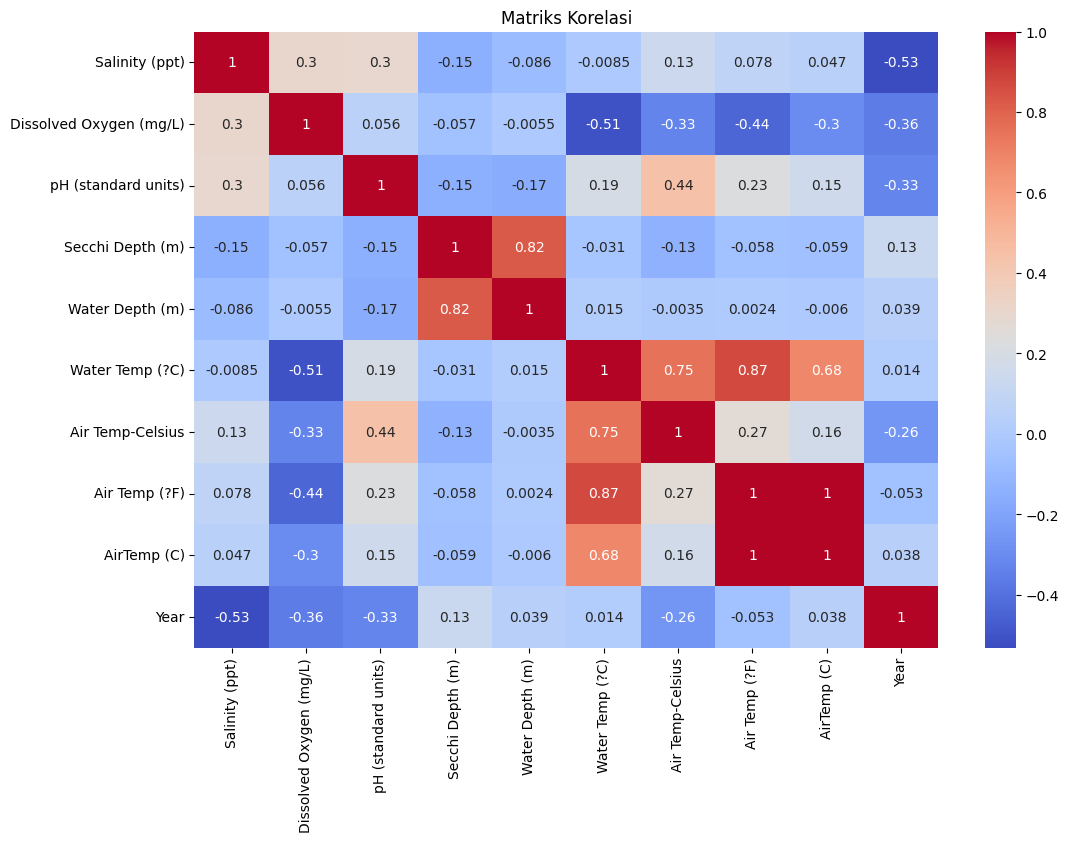

In [56]:
# Matriks korelasi
correlation_matrix = df.corr(numeric_only=True)

# Visualisasi heatmap dari matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()


<p><b>4. Visualisasi Data</b></p>
<ul>
<li>Menggunakan berbagai teknik visualisasi untuk memahami distribusi data, hubungan antar variabel.</li>
</ul>

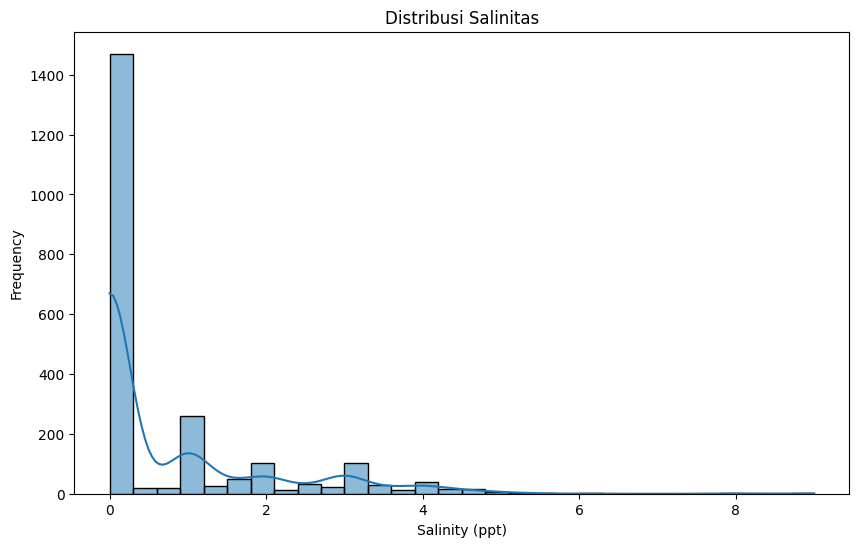

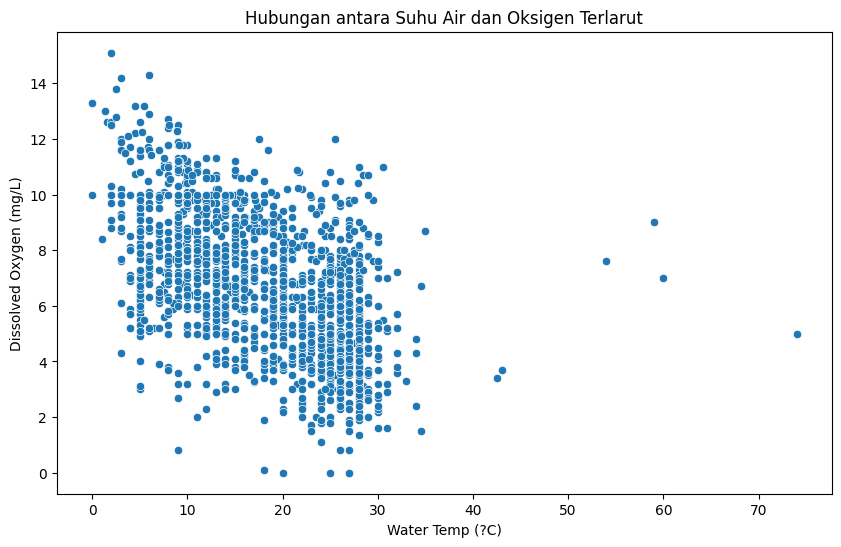

In [57]:
# Histogram dari salinitas
plt.figure(figsize=(10, 6))
sns.histplot(df['Salinity (ppt)'], bins=30, kde=True)
plt.title('Distribusi Salinitas')
plt.xlabel('Salinity (ppt)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot antara oksigen terlarut dan suhu air
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Water Temp (?C)', y='Dissolved Oxygen (mg/L)', data=df)
plt.title('Hubungan antara Suhu Air dan Oksigen Terlarut')
plt.xlabel('Water Temp (?C)')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.show()


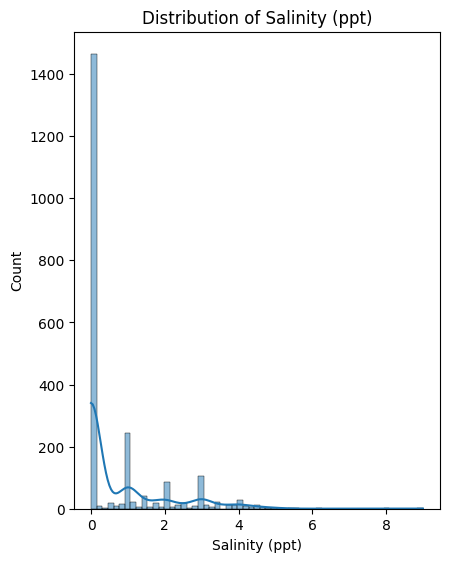

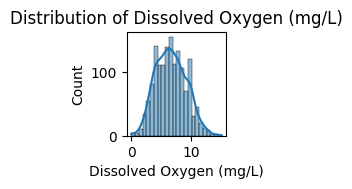

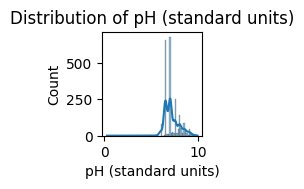

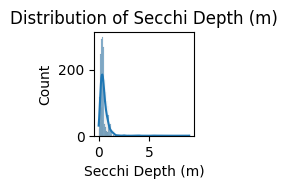

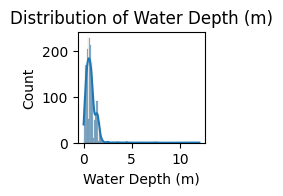

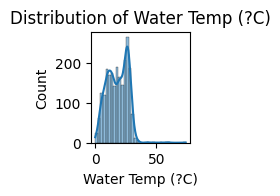

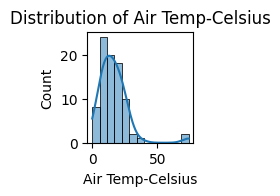

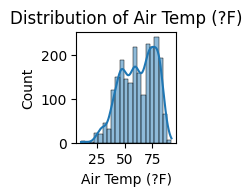

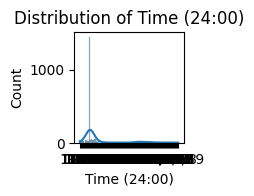

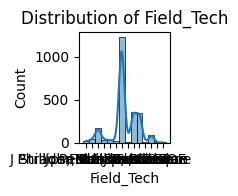

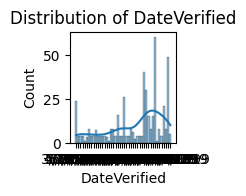

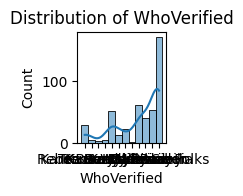

In [58]:
# Melakukan setup matplotlib
plt.figure(figsize=(16, 16))

# Membuat plot untuk setiap feature
for i, column in enumerate(df.columns[3:-2],1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')

    plt.tight_layout()
    plt.show()

<p><b>5. Pemeriksaan Nilai Hilang</b></p>
<ul>
<li>Mengidentifikasi kolom kolom yang memiliki nilai hilang dan jumlahnya</li>
</ul>

In [59]:
# Melakuakn pengecekan untuk missing values
missing_values = df.isnull().sum()

# Mengidentifikasi Outlier mengggunakan IQR
numeric_data = df.select_dtypes(include='number')

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3-Q1

outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()

# Menampilkan missing values dan outliers
missing_values, outliers

(Site_Id                       1
 Unit_Id                    2339
 Read_Date                     5
 Salinity (ppt)              130
 Dissolved Oxygen (mg/L)     851
 pH (standard units)          95
 Secchi Depth (m)             73
 Water Depth (m)              71
 Water Temp (?C)             121
 Air Temp-Celsius           2286
 Air Temp (?F)                71
 Time (24:00)                 63
 Field_Tech                   39
 DateVerified               1918
 WhoVerified                1918
 AirTemp (C)                   0
 Year                          0
 dtype: int64,
 Salinity (ppt)             254
 Dissolved Oxygen (mg/L)      3
 pH (standard units)         47
 Secchi Depth (m)           119
 Water Depth (m)             49
 Water Temp (?C)              5
 Air Temp-Celsius             2
 Air Temp (?F)                0
 AirTemp (C)                 71
 Year                         5
 dtype: int64)

In [60]:
# Mengatasi missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Mengatasi outliers menggunakan Winsorizing
from scipy.stats.mstats import winsorize

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    df[column] = winsorize(df[column], limits=[0.05, 0.05])

missing_values_after = df.isnull().sum()

missing_values_after


Site_Id                       1
Unit_Id                    2339
Read_Date                     5
Salinity (ppt)                0
Dissolved Oxygen (mg/L)       0
pH (standard units)           0
Secchi Depth (m)              0
Water Depth (m)               0
Water Temp (?C)               0
Air Temp-Celsius              0
Air Temp (?F)                 0
Time (24:00)                 63
Field_Tech                   39
DateVerified               1918
WhoVerified                1918
AirTemp (C)                   0
Year                          0
dtype: int64

In [61]:
# Mengisi kolom dengan sisa missing value dan kolom yang tidak relevan dengan median
data_cleaned = df.drop(columns=['Site_Id', 'Unit_Id', 'Read_Date', 'Time (24:00)', 'Field_Tech', 'DateVerified', 'WhoVerified'])
data_cleaned= data_cleaned.fillna(data_cleaned.median())

data_cleaned.isnull().sum()


Salinity (ppt)             0
Dissolved Oxygen (mg/L)    0
pH (standard units)        0
Secchi Depth (m)           0
Water Depth (m)            0
Water Temp (?C)            0
Air Temp-Celsius           0
Air Temp (?F)              0
AirTemp (C)                0
Year                       0
dtype: int64

In [62]:
duplicated = df.duplicated().sum()
print("Data Duplikasi : ", duplicated)

Data Duplikasi :  0


<h5><b>Poses Feature Dataset</b></h5>
<p style = 'text-align: justify;'>Feature Engineering adlaah proses membuat fitur fitur baru dari data yang ada atau mengubah fitur yang sudah ada untuk meningkatkan performa model machine learning</p>

<p><b>1. Normalisasi / Penskalaan Data</b></p>
<ul>
<li>Menormalisasi atau menskalakan data untuk memastikan bahwa semua fitur memiliki skala yang sama, yang penting untuk algoritma yang sensitif terhadap skala.</li>
</ul>

In [63]:
from sklearn.preprocessing import StandardScaler

# Kolom yang akan dinormalisasi
cols_to_normalize = ['Salinity (ppt)', 'Dissolved Oxygen (mg/L)', 'pH (standard units)',
                     'Secchi Depth (m)', 'Water Depth (m)', 'Water Temp (?C)', 'Air Temp (?F)', 'AirTemp (C)']

scaler = StandardScaler()
data_cleaned[cols_to_normalize] = scaler.fit_transform(data_cleaned[cols_to_normalize])


<p><b>2. Pembagian Data: Training dan Testing</b></p>
<ul>
<li>Membagi dan menjadikan data training dan testing dengan proporsi yang sesuai (80:20)</li>
</ul>

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# Mendefinisakn Feature dan target variable
X = data_cleaned.drop(columns=['Dissolved Oxygen (mg/L)'])
y = data_cleaned['Dissolved Oxygen (mg/L)']

# Membagi menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)


<h5><b>Proses Learning atau Modelling</b></h5>
<p style = 'text-align: justify;'>Setelah melalui tahap Eksplorasi Data Awal (EDA) dan Feature Engineering, langkah berikutnya adalah membangun dan melatih model machine learning.</p>

<p><b>1. Memilih Model</b></p>
<ul>
<li>Memilih algoritma machine learning yang akan digunakan untuk klasifikasi. Karena pada project ini  saya mengankat judul Random Forest, maka di sini akan menggunakan Random Forest untuk algoritma machine learning nya</li>
</ul>

<p><b>2. Inisialisasi Model</b></p>
<ul>
<li>Membuat instance dari model yang akan digunakan</li>
</ul>

In [66]:
from sklearn.ensemble import RandomForestRegressor

# Inisialisasi model
rf_model = RandomForestRegressor(random_state=42)


<p><b>3. Melatih Model</b></p>
<ul>
<li>Melatih model dengan data training</li>
</ul>

In [67]:
# Melatih model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

<p><b>4. Memprediksi dengan Model</b></p>
<ul>
<li>Menggunakan data testing untuk memprediksi nilai dengan model yang telah dilatih</li>
</ul>

In [68]:
rf_pred = rf_model.predict(X_test)


<h5><b>Performa Model</b></h5>
<p style = 'text-align: justify;'>Setelah model dilatih dan prediksi dilakukan, langkah selanjutnya adalah mengevaluasi performa model.</p>

<p><b>1. Evaluasi Model</b></p>
<ul>
<li>Setelah melatih model regresi, penting untuk mengevaluasi pergorma model menggunakan berbagai metriks evaluasi. Dalam kasus model regresi, beberapa metrik egaluasi umum yang digunakan adalah MAE, MSE, dan juga RMSE.</li>
</ul>

In [69]:
# Menghitung metriks evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.5619990163695653
Mean Squared Error (MSE): 0.533783968156144
Root Mean Squared Error (RMSE): 0.7306052067677482


<p><b>2. Laporan Regresi</b></p>
<ul>
<li>Menghasilkan laporan regresi yang akan menampilkan hasil prediksi vs nilai aktual.</li>
</ul>

In [70]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': rf_pred})
print(results.head(10))

        Actual  Predicted
834  -0.039838  -0.555443
1607 -0.378309  -0.161124
100   1.934578   1.354326
1389 -1.619371  -0.922684
56    1.990990   1.896782
1740 -0.039838   0.551923
1928  0.129398   0.418791
611  -0.603957   0.412585
742   0.016574  -0.000914
1068  0.693517  -0.524980


<h5><b>Diskusi Hasil dan Kesimpulan</b></h5>
<p style = 'text-align: justify;'>Setelah melatih model Random Forest Regressor untuk memprediksi kadar oksigen terlarut dalam air(Dissolved Oxygen), berikut adlah hasil evaluasi modelberdasarkan metriks evaluasi yang digunakan :</p>
<p><b>Evaluasi Model</b></p>
<ol>
<li><b>Mean Absolute Error (MAE)</b></li>
<ul>
<li><b>Nilai: 0.56</b></li>
<li><b>Interpretasi: </b></li>
<p>MAE menunjukkan rata rata kesalahan absolut antar nilai prediksi dan nilai aktual. Dalam kasus ini, rata rata kesalahan prediksi adalah 0.56 mg/L. Menunjukkan bahwa prediksi model cukup dekat dengan nilai aktual, dengan kesalahan rata rata sekitar setengah miligram per liter</p>
</ul>
<li><b>Mean Squared Error (MSE)</b></li>
<ul>
<li><b>Nilai: 0.53</b></li>
<li><b>Interpretasi: </b></li>
<p>MSE memberikan penalti yang lebih besar untuk kesalahan yang besar untuk kesalahan yang lebih besar dengan mengkuadratkan selisih antara nilai prediksi dan nilai aktual. Nilai MSE sebesar 0.53 menunjukkan bahwa, meskipun ada beberapa kesalahn prediksi yang lebih besar, keseluruhan performa model masih dalam rentang yang dapat diterima.</p>
</ul>
<li><b>Root Mean Squared Error (RMSE)</b></li>
<ul>
<li><b>Nilai: 0.73</b></li>
<li><b>Interpretasi: </b></li>
<p>RMSE adalah akar kuadrat dari MSE dan berada dalam skala yang sama dengan data asli. Nilai RMSE sebesar 0.73 menunjukkan bahwa kesalah rata rata model adalah sekitar 0.73 mg/L. Ini memberikan gambaran yang lebih mudah diinterpretasikan tentang seberapa dekat model dengan nilai aktual</p>
</ul>
</ol>

<p><b>Kesimpulan</b></p>
<p style = 'text-align: justify;'>Berdasarkan hasil evaluasi dan analisis prediksi, kita dapat menarik beberapa kesimpulan mengenai pergorma model Random Forest Regression yang digunakan untuk memprediksi kadar oksigen terlarut dalam air: </p>
<ol>
<li><b>Akurasi yang baik</b></li>
<ul>
<li>Model Random Forest Regressor menunjukkan performa yang baik dengan nilai MAE sebesar 0.56, MSE sebesar 0.53, dan RMSE sebesar 0.73. Ini menunjukkan bahwa model mampu memprediksi kadar oksigen terlarut dengan kesalahan yang relatif kecil. </li>
</ul>
<li><b>Penanganan Kesalahan Besar</b></li>
<ul>
<li>Meskipun MSE memberikan penalti yang lebih besar untuk kesalahan yang lebih besar, nilai MSE yang rendah menunjukkan bahwa model tidak terlalu banyak menghasilkan prediksi yang sangat melenceng dari nilai aktual.</li>
</ul>
<li><b>Keandalan Prediksi</b></li>
<ul>
<li>Prediksi model cukup konsisten dan dapat diandalkan untuk digunakan dalam prakiraan kadar oksigen terlarut dalam air. Hal ini dapat bermanfaat dalam berbagai aplikasi seperti monitoring kualitas air dan pengambilan keputusan terkait lingkungan.</li>
</ul>
</ol>